# Chapter 4: Conditional Probability

In the previous chapters, we laid the groundwork for probability, exploring sample spaces, events, and counting techniques. Now, we venture into one of the most fundamental and powerful concepts in probability theory: **conditional probability**.

Often, we are interested in the probability of an event occurring *given that* another event has already happened. Our knowledge or assumptions about one event can change our assessment of the probability of another. This is the essence of conditional probability. It allows us to update our beliefs in the face of new information.

## 1. Definition and Intuition

**Conditional Probability** measures the probability of an event $A$ occurring given that another event $B$ has already occurred (or is known to have occurred). We denote this as $P(A|B)$, read as "the probability of A given B".

**Intuition:** Imagine the entire sample space $S$. When we know that event $B$ has occurred, our focus effectively narrows down from the entire sample space $S$ to just the outcomes within $B$. We are now interested in the probability that $A$ occurs *within this new, reduced sample space* $B$. The outcomes favourable to "A given B" are those that belong to both $A$ and $B$, i.e., $A \cap B$.

**Formal Definition:**
For any two events $A$ and $B$ from a sample space $S$, where $P(B) > 0$, the conditional probability of $A$ given $B$ is defined as:

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

where:
* $P(A \cap B)$ is the probability that both events $A$ and $B$ occur.
* $P(B)$ is the probability that event $B$ occurs.

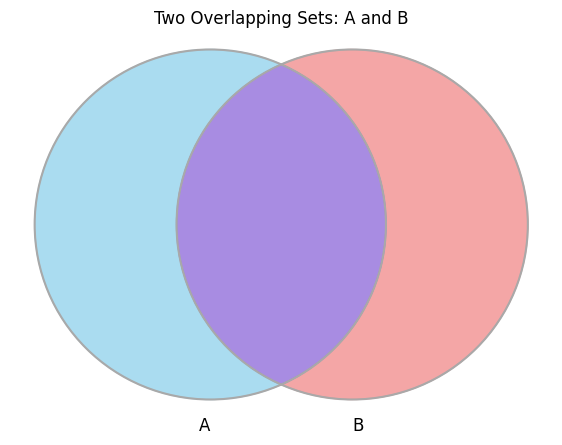

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

# Create a figure for the plot
plt.figure(figsize=(7, 5))

# Create the Venn diagram - sizes (1, 1, 1) define the areas for overlap calculation
# The labels generated from these sizes will be hidden below.
v = venn2(subsets=(1, 1, 1), set_labels=('A', 'B'), set_colors=('grey', 'grey'), alpha=1.0)

# --- Apply nicer, distinct colors manually ---
patch_A_only = v.get_patch_by_id('10')
if patch_A_only:
    patch_A_only.set_color('skyblue')
    patch_A_only.set_alpha(0.7)

patch_B_only = v.get_patch_by_id('01')
if patch_B_only:
    patch_B_only.set_color('lightcoral')
    patch_B_only.set_alpha(0.7)

patch_intersection = v.get_patch_by_id('11')
if patch_intersection:
    patch_intersection.set_color('mediumpurple')
    patch_intersection.set_alpha(0.8)

# --- Remove the default subset size labels ---
# Get the labels by their ID ('10' for A only, '01' for B only, '11' for intersection)
# and set their text to an empty string.
label_A_only = v.get_label_by_id('10')
if label_A_only:
    label_A_only.set_text('')

label_B_only = v.get_label_by_id('01')
if label_B_only:
    label_B_only.set_text('')

label_intersection = v.get_label_by_id('11')
if label_intersection:
    label_intersection.set_text('')

# --- Add outlines ---
c = venn2_circles(subsets=(1, 1, 1), linestyle='solid', linewidth=1.5, color='darkgrey')

# --- Final Touches ---
plt.title("Sets: A and B")
plt.axis('equal')
plt.axis('off')
plt.show()

**Example:** What is the probability it rains tomorrow ($A$), given that it is cloudy today ($B$)?
Intuitively, knowing it's cloudy today might increase our assessment of the probability of rain tomorrow compared to not knowing anything about today's weather. Conditional probability provides a formal way to calculate this updated probability, perhaps using historical weather data where $P(A \cap B)$ is the probability of a cloudy day followed by a rainy day, and $P(B)$ is the overall probability of a day being cloudy.

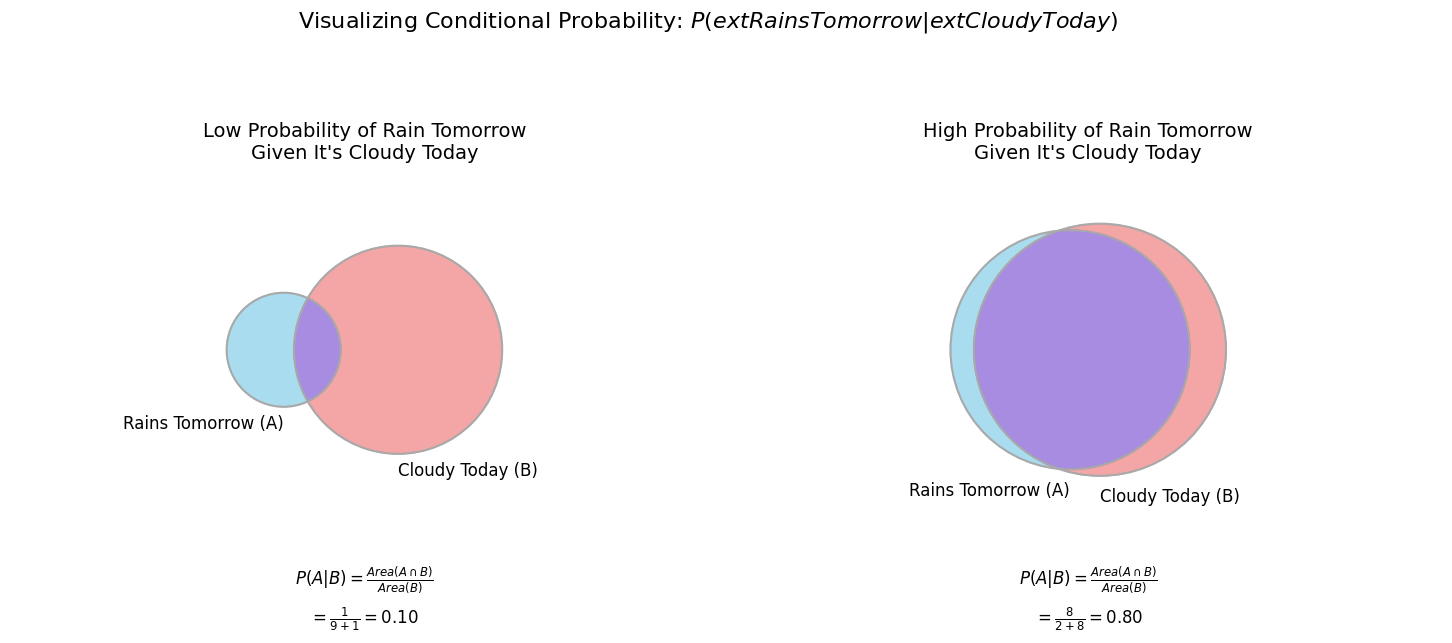

In [11]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import numpy as np # Only needed if we were to use np.round or other functions

def plot_conditional_probability_venn(ax, subsets, title, set_A_label, set_B_label):
    """
    Plots a Venn diagram to visualize conditional probability P(A|B).

    Args:
        ax: Matplotlib axis object to plot on.
        subsets: A 3-element tuple (Ab, aB, AB) representing:
                 - Ab: Area of A not in B (A only)
                 - aB: Area of B not in A (B only)
                 - AB: Area of A and B (Intersection)
        title: Title for the subplot.
        set_A_label: Label for set A.
        set_B_label: Label for set B.
    """
    # Create the Venn diagram. Initial colors are placeholders.
    v = venn2(subsets=subsets, set_labels=(set_A_label, set_B_label), ax=ax, set_colors=('grey', 'grey'), alpha=1.0)

    # --- Apply specific colors ---
    # Patch for A only (A and not B)
    patch_A_only = v.get_patch_by_id('10')
    if patch_A_only:
        patch_A_only.set_color('skyblue')
        patch_A_only.set_alpha(0.7)

    # Patch for B only (B and not A)
    patch_B_only = v.get_patch_by_id('01')
    if patch_B_only:
        patch_B_only.set_color('lightcoral')
        patch_B_only.set_alpha(0.7)

    # Patch for Intersection (A and B)
    patch_intersection = v.get_patch_by_id('11')
    if patch_intersection:
        patch_intersection.set_color('mediumpurple')
        patch_intersection.set_alpha(0.8)

    # --- Remove default subset size labels ---
    for id_ in ['10', '01', '11', 'A', 'B']: # Include 'A' and 'B' if set labels also show numbers by default
        label = v.get_label_by_id(id_)
        if label:
            label.set_text('') # Clear numeric labels from areas

    # --- Customize set labels (text above circles) ---
    if v.get_label_by_id('A'):
        v.get_label_by_id('A').set_text(set_A_label)
        v.get_label_by_id('A').set_fontsize(12)
    if v.get_label_by_id('B'):
        v.get_label_by_id('B').set_text(set_B_label)
        v.get_label_by_id('B').set_fontsize(12)


    # --- Add outlines ---
    venn2_circles(subsets=subsets, linestyle='solid', linewidth=1.5, color='darkgrey', ax=ax)

    # --- Final Touches for the subplot ---
    ax.set_title(title, fontsize=14, y=1.05) # Adjust y to ensure title is clear

    # Calculate and display the conditional probability P(A|B)
    Ab, aB, AB = subsets # (Area A-B, Area B-A, Area A&B)
    
    # P(A|B) = Area(A intersect B) / Area(B) = AB / (aB + AB)
    if (aB + AB) == 0: # Avoid division by zero if Area(B) = 0
        prob_A_given_B_text = "$P(A|B)$ is undefined ($Area(B)=0$)"
    else:
        prob_A_given_B = AB / (aB + AB)
        # Using a slightly more descriptive notation for areas in the formula text
        prob_A_given_B_text = (
            f"$P(A|B) = \\frac{{Area(A \\cap B)}}{{Area(B)}}$\n"
            f"$= \\frac{{{AB}}}{{{aB} + {AB}}} = {prob_A_given_B:.2f}$"
        )

    # Add the probability text below the diagram
    ax.text(0.5, -0.15, prob_A_given_B_text, ha='center', va='top', transform=ax.transAxes, fontsize=12, linespacing=1.5)

    ax.axis('equal') # Ensures circles look like circles
    ax.axis('off')   # Hide the x and y axes

# --- Main script to create the side-by-side plots ---
fig, axes = plt.subplots(1, 2, figsize=(15, 7.5)) # Adjusted figsize for better text display

set_A_true_label = "Rains Tomorrow"
set_B_true_label = "Cloudy Today"

# For diagram labels, add (A) and (B) to link to formula
set_A_diagram_label = f"{set_A_true_label} (A)"
set_B_diagram_label = f"{set_B_true_label} (B)"

# Case 1: Low probability of Rain Tomorrow given Cloudy Today
# P(A|B) = AB / (aB + AB)
# Let AB = 1 (Cloudy Today AND Rains Tomorrow)
# Let aB = 9 (Cloudy Today AND No Rain Tomorrow)
# So, P(A|B) = 1 / (9 + 1) = 0.1
# Let Ab = 2 (Rains Tomorrow AND Not Cloudy Today - doesn't affect P(A|B))
subsets1 = (2, 9, 1)  # (Ab, aB, AB)
plot_conditional_probability_venn(axes[0], subsets1,
                                  "Low Probability of Rain Tomorrow\nGiven It's Cloudy Today",
                                  set_A_diagram_label, set_B_diagram_label)

# Case 2: High probability of Rain Tomorrow given Cloudy Today
# Let AB = 8 (Cloudy Today AND Rains Tomorrow)
# Let aB = 2 (Cloudy Today AND No Rain Tomorrow)
# So, P(A|B) = 8 / (2 + 8) = 0.8
# Let Ab = 1 (Rains Tomorrow AND Not Cloudy Today)
subsets2 = (1, 2, 8)  # (Ab, aB, AB)
plot_conditional_probability_venn(axes[1], subsets2,
                                  "High Probability of Rain Tomorrow\nGiven It's Cloudy Today",
                                  set_A_diagram_label, set_B_diagram_label)

# Add an overall title for the figure
fig.suptitle(f"Visualizing Conditional Probability: $P(\text{{{set_A_true_label}}} | \text{{{set_B_true_label}}})$", fontsize=16)

# Adjust layout to prevent overlapping elements
plt.tight_layout(rect=[0, 0.08, 1, 0.92]) # rect=[left, bottom, right, top]
plt.show()

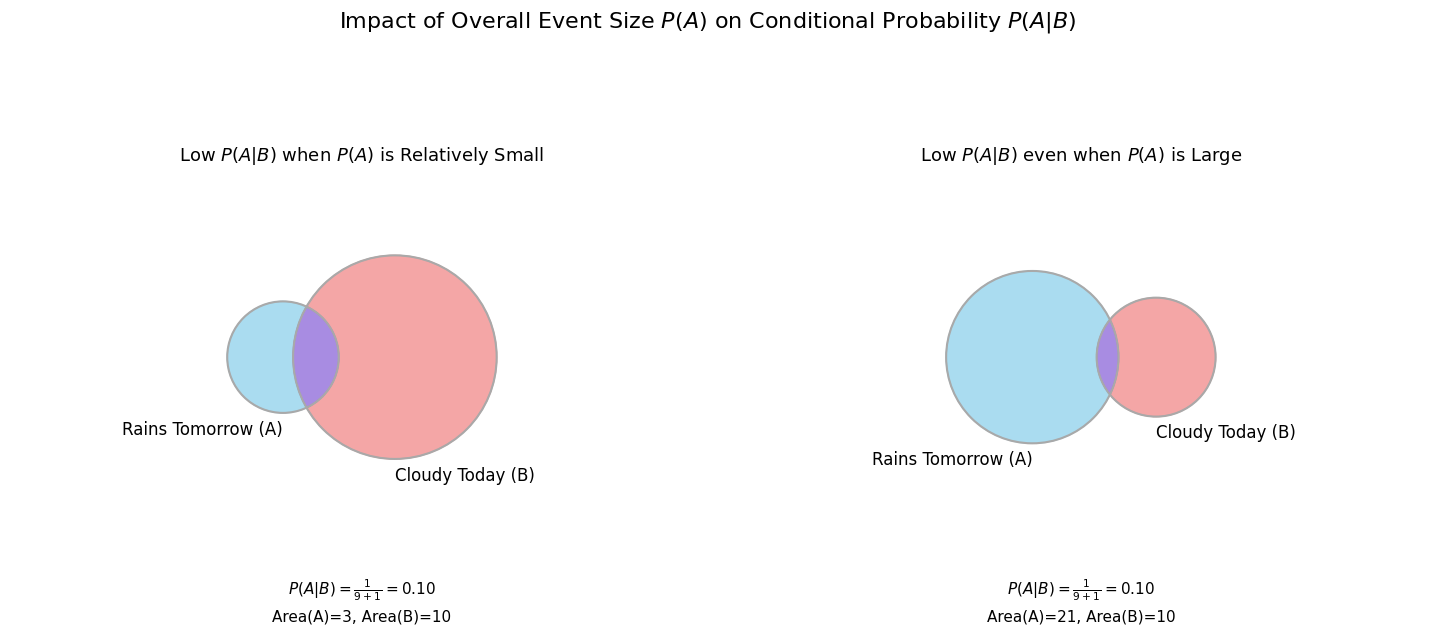

In [12]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

def plot_conditional_probability_venn(ax, subsets, title, set_A_label, set_B_label):
    """
    Plots a Venn diagram to visualize conditional probability P(A|B).

    Args:
        ax: Matplotlib axis object to plot on.
        subsets: A 3-element tuple (Ab, aB, AB) representing:
                 - Ab: Area of A not in B (A only)
                 - aB: Area of B not in A (B only)
                 - AB: Area of A and B (Intersection)
        title: Title for the subplot.
        set_A_label: Label for set A.
        set_B_label: Label for set B.
    """
    v = venn2(subsets=subsets, set_labels=(set_A_label, set_B_label), ax=ax,
              set_colors=('grey', 'grey'), alpha=1.0) # Initial colors

    # Apply specific colors
    patch_A_only = v.get_patch_by_id('10')
    if patch_A_only:
        patch_A_only.set_color('skyblue')
        patch_A_only.set_alpha(0.7)

    patch_B_only = v.get_patch_by_id('01')
    if patch_B_only:
        patch_B_only.set_color('lightcoral')
        patch_B_only.set_alpha(0.7)

    patch_intersection = v.get_patch_by_id('11')
    if patch_intersection:
        patch_intersection.set_color('mediumpurple')
        patch_intersection.set_alpha(0.8)

    # Remove default subset size labels
    for id_ in ['10', '01', '11']:
        label = v.get_label_by_id(id_)
        if label:
            label.set_text('')

    # Customize set labels (text above circles)
    if v.get_label_by_id('A'):
        v.get_label_by_id('A').set_text(set_A_label)
        v.get_label_by_id('A').set_fontsize(12)
    if v.get_label_by_id('B'):
        v.get_label_by_id('B').set_text(set_B_label)
        v.get_label_by_id('B').set_fontsize(12)

    venn2_circles(subsets=subsets, linestyle='solid', linewidth=1.5, color='darkgrey', ax=ax)
    ax.set_title(title, fontsize=13, y=1.08) # Adjust y for title spacing

    Ab, aB, AB = subsets
    if (aB + AB) == 0:
        prob_A_given_B_text = "$P(A|B)$ is undefined ($Area(B)=0$)"
    else:
        prob_A_given_B = AB / (aB + AB)
        total_A_area = Ab + AB
        total_B_area = aB + AB
        prob_A_given_B_text = (
            f"$P(A|B) = \\frac{{{AB}}}{{{aB} + {AB}}} = {prob_A_given_B:.2f}$\n"
            f"Area(A)={total_A_area}, Area(B)={total_B_area}"
        )

    ax.text(0.5, -0.18, prob_A_given_B_text, ha='center', va='top',
            transform=ax.transAxes, fontsize=11, linespacing=1.5)
    ax.axis('equal')
    ax.axis('off')

# --- Main script for the new illustrative charts ---
fig, axes = plt.subplots(1, 2, figsize=(15, 7.5))

set_A_true_label = "Rains Tomorrow"
set_B_true_label = "Cloudy Today"
set_A_diagram_label = f"{set_A_true_label} (A)"
set_B_diagram_label = f"{set_B_true_label} (B)"

# Chart 1: Low P(A|B) when P(A) is also relatively small
# P(A|B) = AB / (aB + AB)
# AB = 1, aB = 9  => P(A|B) = 1 / (9 + 1) = 0.1
# Ab = 2          => Area(A) = Ab + AB = 2 + 1 = 3
subsets1 = (2, 9, 1)  # (Ab, aB, AB)
plot_conditional_probability_venn(axes[0], subsets1,
                                  "Low $P(A|B)$ when $P(A)$ is Relatively Small",
                                  set_A_diagram_label, set_B_diagram_label)

# Chart 2: Low P(A|B) even when P(A) is large
# P(A|B) = AB / (aB + AB)
# AB = 1, aB = 9  => P(A|B) = 1 / (9 + 1) = 0.1 (P(A|B) and Area(B) are the same as Chart 1)
# Ab = 20         => Area(A) = Ab + AB = 20 + 1 = 21 (Area(A) is now much larger)
subsets2 = (20, 9, 1)  # (Ab, aB, AB)
plot_conditional_probability_venn(axes[1], subsets2,
                                  "Low $P(A|B)$ even when $P(A)$ is Large",
                                  set_A_diagram_label, set_B_diagram_label)

fig.suptitle(f"Impact of Overall Event Size $P(A)$ on Conditional Probability $P(A|B)$",
             fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0.08, 1, 0.90]) # rect=[left, bottom, right, top]
plt.show()

## 2. The Multiplication Rule for Conditional Probability

Rearranging the definition of conditional probability gives us the **General Multiplication Rule**, which is useful for calculating the probability of the intersection of two events:

$$ P(A \cap B) = P(A|B) P(B) $$

Similarly, if $P(A) > 0$, we can write:

$$ P(A \cap B) = P(B|A) P(A) $$

This rule is particularly helpful when dealing with sequential events, where the outcome of the first event affects the probability of the second.

**Example:** Probability of drawing two Kings from a standard 52-card deck without replacement.
Let $A$ be the event "the first card drawn is a King" and $B$ be the event "the second card drawn is a King".
We want to find $P(A \cap B)$.
Using the multiplication rule: $P(A \cap B) = P(B|A) P(A)$.
* $P(A)$: There are 4 Kings in 52 cards, so $P(A) = \frac{4}{52}$.
* $P(B|A)$: *Given* that the first card was a King, there are now 3 Kings left in the remaining 51 cards. So, $P(B|A) = \frac{3}{51}$.

Therefore,

$$
\begin{align*}
P(\text{Draw 2 Kings}) &= P(A \cap B) \\
&= P(B|A) P(A) \\
&= \frac{3}{51} \times \frac{4}{52} \\
&= \frac{12}{2652} \\
&\approx 0.0045
\end{align*}
$$

This rule can be extended to more than two events. For three events $A, B, C$:

$$ P(A \cap B \cap C) = P(C | A \cap B) P(B | A) P(A) $$

## 3. The Law of Total Probability

Sometimes, calculating the probability of an event $A$ directly is difficult. However, we might know the conditional probabilities of $A$ occurring under various mutually exclusive and exhaustive scenarios. The Law of Total Probability allows us to find the overall probability of $A$ by considering these scenarios.

**Definition:** Let $B_1, B_2, \ldots, B_n$ be a **partition** of the sample space $S$. This means:
1.  $B_i \cap B_j = \emptyset$ for all $i \neq j$ (The events are mutually exclusive).
2.  $B_1 \cup B_2 \cup \ldots \cup B_n = S$ (The events cover the entire sample space, they are exhaustive).
3.  $P(B_i) > 0$ for all $i$.

Then, for any event $A$ in the sample space $S$, the Law of Total Probability states:

$$ P(A) = \sum_{i=1}^{n} P(A | B_i) P(B_i) $$

$$
\begin{align*}
P(A) ={}& P(A|B_1)P(B_1) \\
& + P(A|B_2)P(B_2) \\
& + \ldots \\
& + P(A|B_n)P(B_n)
\end{align*}
$$

**Intuition:** The overall probability of $A$ is a weighted average of its conditional probabilities under each scenario ($B_i$), where the weights are the probabilities of those scenarios ($P(B_i)$) themselves.

**Example:** Finding the overall probability a randomly selected person has COVID, considering different testing rates and infection probabilities in different age groups.
Let $A$ be the event "a person has COVID".
Let $B_1$ be the event "person is in Age Group 1", $B_2$ be "person is in Age Group 2", ..., $B_n$ be "person is in Age Group n". These age groups form a partition of the population.
We might know:
* The probability a person falls into each age group: $P(B_1), P(B_2), \ldots, P(B_n)$.
* The probability a person has COVID *given* they are in a specific age group: $P(A|B_1), P(A|B_2), \ldots, P(A|B_n)$.

Using the Law of Total Probability, we can calculate the overall probability of having COVID:

$$
\begin{align*}
P(A) ={}& P(A|B_1)P(B_1) \\
& + P(A|B_2)P(B_2) \\
& + \ldots \\
& + P(A|B_n)P(B_n)
\end{align*}
$$

## 4. Tree Diagrams

Tree diagrams are a useful visualization tool for problems involving sequences of events, especially when conditional probabilities are involved.

* Each branch represents an event.
* The probability of each event is written on the branch.
* Branches emanating from a single point represent mutually exclusive outcomes of a stage, and their probabilities should sum to 1.
* The probability of reaching a specific endpoint (a sequence of events) is found by multiplying the probabilities along the path leading to that endpoint (using the Multiplication Rule).
* The probability of an event that can occur via multiple paths is found by summing the probabilities of those paths (related to the Law of Total Probability).

**Example:** Visualizing the probabilities of outcomes in a sequence of two potentially biased coin flips.
Suppose a coin has $P(\text{Heads}) = 0.6$ and $P(\text{Tails}) = 0.4$. We flip it twice. The outcomes are independent.

```
             Start
          /        \
      0.6/          \0.4
        H            T       <-- Flip 1
      /   \        /   \
  0.6/  0.4\   0.6/  0.4\
    H       T   H        T   <-- Flip 2

```

* **Path 1 (HH):** 

$$
\begin{align*}
P(H_1 \cap H_2) &= P(H_1) \times P(H_2 | H_1) \\
&= 0.6 \times 0.6 \\
&= 0.36
\end{align*}
$$
$$
\text{(Since flips are independent, } P(H_2|H_1) = P(H_2) = 0.6 \text{)}
$$

* **Path 2 (HT):** $P(\text{H on 1st} \cap \text{T on 2nd}) = 0.6 \times 0.4 = 0.24$.
* **Path 3 (TH):** $P(\text{T on 1st} \cap \text{H on 2nd}) = 0.4 \times 0.6 = 0.24$.
* **Path 4 (TT):** $P(\text{T on 1st} \cap \text{T on 2nd}) = 0.4 \times 0.4 = 0.16$.

Note that the probabilities of all possible outcomes sum to 1: $0.36 + 0.24 + 0.24 + 0.16 = 1.0$.

We can use this to find probabilities of combined events, e.g., 

$$
\begin{align*}
P(\text{Exactly one Head}) &= P(HT) + P(TH) \\
&= 0.24 + 0.24 \\
&= 0.48
\end{align*}
$$

## 5. Hands-on: Simulations and Calculations

Let's use Python to explore these concepts. We'll need libraries like `numpy` for numerical operations and random sampling, and potentially `pandas` for handling data.

In [1]:
import numpy as np
import pandas as pd
import random

### 5.1 Simulating Conditional Events: Drawing Cards

Let's simulate drawing two cards from a standard 52-card deck *without replacement* and verify the conditional probability $P(\text{2nd is King} | \text{1st is King})$. We expect this to be $3/51$.

We can also estimate the overall probability $P(\text{2nd is King})$. By symmetry or using the Law of Total Probability, this should be $4/52$.

$$
\begin{aligned}
P(\text{2nd King}) &= P(\text{2nd King} | \text{1st King})P(\text{1st King}) \\
&\quad + P(\text{2nd King} | \text{1st Not King})P(\text{1st Not King})
\end{aligned}
$$

$$
\begin{aligned}
P(\text{2nd King}) &= \left(\frac{3}{51}\right)\left(\frac{4}{52}\right) + \left(\frac{4}{51}\right)\left(\frac{48}{52}\right) \\
&= \frac{12 + 192}{51 \times 52} \\
&= \frac{204}{2652} \\
&= \frac{4}{52}
\end{aligned}
$$

In [2]:
# Represent the deck
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', 'T', 'J', 'Q', 'K', 'A']
suits = ['H', 'D', 'C', 'S'] # Hearts, Diamonds, Clubs, Spades
deck = [rank + suit for rank in ranks for suit in suits]
kings = {'KH', 'KD', 'KC', 'KS'}

In [3]:
# Simulation parameters
num_simulations = 100000

In [4]:
# Counters
count_first_king = 0
count_second_king = 0
count_both_king = 0
count_second_king_given_first_king = 0

In [5]:
# Run simulations
for _ in range(num_simulations):
    # Shuffle the deck implicitly by drawing random samples
    drawn_cards = random.sample(deck, 2)
    card1 = drawn_cards[0]
    card2 = drawn_cards[1]

    # Check conditions
    is_first_king = card1 in kings
    is_second_king = card2 in kings

    if is_first_king:
        count_first_king += 1
        if is_second_king:
            count_second_king_given_first_king += 1

    if is_second_king:
        count_second_king += 1

    if is_first_king and is_second_king:
        count_both_king += 1

In [6]:
# Calculate probabilities from simulation
prob_first_king_sim = count_first_king / num_simulations
prob_second_king_sim = count_second_king / num_simulations
prob_both_king_sim = count_both_king / num_simulations

In [7]:
# Calculate conditional probability P(B|A) = P(A and B) / P(A)
# We can estimate this directly from the counts:
if count_first_king > 0:
    prob_second_given_first_sim = count_second_king_given_first_king / count_first_king
else:
    prob_second_given_first_sim = 0

In [8]:
# Theoretical values
prob_first_king_theory = 4/52
prob_second_king_theory = 4/52 # By symmetry
prob_both_king_theory = (4/52) * (3/51)
prob_second_given_first_theory = 3/51

In [9]:
# Print results
print(f"--- Theoretical Probabilities ---")
print(f"P(1st is King): {prob_first_king_theory:.6f} ({4}/{52})")
print(f"P(2nd is King): {prob_second_king_theory:.6f} ({4}/{52})")
print(f"P(Both Kings): {prob_both_king_theory:.6f}")
print(f"P(2nd is King | 1st is King): {prob_second_given_first_theory:.6f} ({3}/{51})")
print("\n")
print(f"--- Simulation Results ({num_simulations} runs) ---")
print(f"Estimated P(1st is King): {prob_first_king_sim:.6f}")
print(f"Estimated P(2nd is King): {prob_second_king_sim:.6f}")
print(f"Estimated P(Both Kings): {prob_both_king_sim:.6f}")
print(f"Estimated P(2nd is King | 1st is King): {prob_second_given_first_sim:.6f}")

--- Theoretical Probabilities ---
P(1st is King): 0.076923 (4/52)
P(2nd is King): 0.076923 (4/52)
P(Both Kings): 0.004525
P(2nd is King | 1st is King): 0.058824 (3/51)


--- Simulation Results (100000 runs) ---
Estimated P(1st is King): 0.077270
Estimated P(2nd is King): 0.076120
Estimated P(Both Kings): 0.004400
Estimated P(2nd is King | 1st is King): 0.056943


The simulation results should be very close to the theoretical values, demonstrating how simulation can approximate probabilistic calculations. The larger `num_simulations`, the closer the estimates will typically be.

### 5.2 Calculating Conditional Probabilities from Data

Imagine we have data about website visitors, including whether they made a purchase and whether they visited a specific product page first. We can use Pandas to calculate conditional probabilities from this data.

In [10]:
# Create sample data
data = {
    'visited_product_page': [True, False, True, True, False, False, True, True, False, True],
    'made_purchase':        [True, False, False, True, False, True, False, True, False, False]
}
df = pd.DataFrame(data)

In [11]:
print("Sample Visitor Data:")
print(df)
print("\n")

Sample Visitor Data:
   visited_product_page  made_purchase
0                  True           True
1                 False          False
2                  True          False
3                  True           True
4                 False          False
5                 False           True
6                  True          False
7                  True           True
8                 False          False
9                  True          False




In [12]:
# Calculate basic probabilities
n_total = len(df)
n_visited_page = df['visited_product_page'].sum()
n_purchased = df['made_purchase'].sum()
n_visited_and_purchased = len(df[(df['visited_product_page'] == True) & (df['made_purchase'] == True)])

In [13]:
P_visited = n_visited_page / n_total
P_purchased = n_purchased / n_total
P_visited_and_purchased = n_visited_and_purchased / n_total

In [14]:
print(f"P(Visited Page) = {P_visited:.2f}")
print(f"P(Purchased) = {P_purchased:.2f}")
print(f"P(Visited and Purchased) = {P_visited_and_purchased:.2f}")
print("\n")

P(Visited Page) = 0.60
P(Purchased) = 0.40
P(Visited and Purchased) = 0.30




In [15]:
# Calculate Conditional Probability: P(Purchase | Visited Page)
# P(A|B) = P(A and B) / P(B)
# A = Purchased, B = Visited Page
if P_visited > 0:
    P_purchased_given_visited = P_visited_and_purchased / P_visited
    print(f"Calculated P(Purchased | Visited Page) = {P_purchased_given_visited:.2f}")
else:
    print("Cannot calculate P(Purchased | Visited Page) as P(Visited Page) is 0.")

Calculated P(Purchased | Visited Page) = 0.50


In [16]:
# Direct calculation from counts:
# Find subset where Visited Page is True
df_visited = df[df['visited_product_page'] == True]
# Among those, find how many Purchased
n_purchased_in_visited = df_visited['made_purchase'].sum()
n_visited = len(df_visited) # Same as n_visited_page calculated earlier

In [17]:
if n_visited > 0:
    P_purchased_given_visited_direct = n_purchased_in_visited / n_visited
    print(f"Direct P(Purchased | Visited Page) = {P_purchased_given_visited_direct:.2f} ({n_purchased_in_visited}/{n_visited})")
else:
    print("Cannot calculate P(Purchased | Visited Page) directly as no one visited the page.")

Direct P(Purchased | Visited Page) = 0.50 (3/6)


In [18]:
# Calculate Conditional Probability: P(Visited Page | Purchased)
# P(B|A) = P(A and B) / P(A)
# A = Purchased, B = Visited Page
if P_purchased > 0:
    P_visited_given_purchased = P_visited_and_purchased / P_purchased
    print(f"\nCalculated P(Visited Page | Purchased) = {P_visited_given_purchased:.2f}")
else:
    print("\nCannot calculate P(Visited Page | Purchased) as P(Purchased) is 0.")


Calculated P(Visited Page | Purchased) = 0.75


In [19]:
# Direct calculation from counts:
df_purchased = df[df['made_purchase'] == True]
n_visited_in_purchased = df_purchased['visited_product_page'].sum()
n_purchased_total = len(df_purchased) # Same as n_purchased calculated earlier

In [20]:
if n_purchased_total > 0:
    P_visited_given_purchased_direct = n_visited_in_purchased / n_purchased_total
    print(f"Direct P(Visited Page | Purchased) = {P_visited_given_purchased_direct:.2f} ({n_visited_in_purchased}/{n_purchased_total})")
else:
     print("\nCannot calculate P(Visited Page | Purchased) directly as no one made a purchase.")

Direct P(Visited Page | Purchased) = 0.75 (3/4)


This example shows how to compute conditional probabilities directly from observed data, a common task in data analysis. $P(\text{Purchased} | \text{Visited Page})$ tells us the likelihood of a purchase *among those who visited the specific page*, while $P(\text{Visited Page} | \text{Purchased})$ tells us the likelihood that someone who *did* purchase had previously visited that page. These can be very different values!

### 5.3 Applying the Law of Total Probability

Let's use the Law of Total Probability with a manufacturing example. Suppose a factory has two machines, M1 and M2, producing widgets.
* Machine M1 produces 60% of the widgets ($P(M1) = 0.6$).
* Machine M2 produces 40% of the widgets ($P(M2) = 0.4$).
* 2% of widgets from M1 are defective ($P(D|M1) = 0.02$).
* 5% of widgets from M2 are defective ($P(D|M2) = 0.05$).

What is the overall probability that a randomly selected widget is defective ($P(D)$)?

The events M1 (widget produced by M1) and M2 (widget produced by M2) form a partition of the sample space (all widgets). Using the Law of Total Probability:

$P(D) = P(D|M1)P(M1) + P(D|M2)P(M2)$

In [21]:
# Define probabilities
P_M1 = 0.60
P_M2 = 0.40
P_D_given_M1 = 0.02
P_D_given_M2 = 0.05

In [22]:
# Apply Law of Total Probability
P_D = (P_D_given_M1 * P_M1) + (P_D_given_M2 * P_M2)

In [23]:
print(f"P(Defective | M1) = {P_D_given_M1}")
print(f"P(M1) = {P_M1}")
print(f"P(Defective | M2) = {P_D_given_M2}")
print(f"P(M2) = {P_M2}")
print("\n")
print(f"Overall Probability of a Defective Widget P(D) = ({P_D_given_M1} * {P_M1}) + ({P_D_given_M2} * {P_M2}) = {P_D:.4f}")

P(Defective | M1) = 0.02
P(M1) = 0.6
P(Defective | M2) = 0.05
P(M2) = 0.4


Overall Probability of a Defective Widget P(D) = (0.02 * 0.6) + (0.05 * 0.4) = 0.0320


So, the overall probability of finding a defective widget is 3.2%. This weighted average reflects that while M2 produces more defective items proportionatly, M1 produces more items overall.

We could also simulate this:

In [24]:
num_widgets_sim = 100000
defective_count = 0

In [25]:
for _ in range(num_widgets_sim):
    # Decide which machine produced the widget
    if random.random() < P_M1: # Simulates P(M1)
        # Widget from M1
        # Check if it's defective
        if random.random() < P_D_given_M1: # Simulates P(D|M1)
            defective_count += 1
    else:
        # Widget from M2
        # Check if it's defective
        if random.random() < P_D_given_M2: # Simulates P(D|M2)
            defective_count += 1

In [26]:
# Estimate P(D) from simulation
P_D_sim = defective_count / num_widgets_sim

In [27]:
print(f"\n--- Simulation Results ({num_widgets_sim} widgets) ---")
print(f"Estimated overall P(Defective): {P_D_sim:.4f}")


--- Simulation Results (100000 widgets) ---
Estimated overall P(Defective): 0.0326


Again, the simulation provides an estimate very close to the calculated value.

---

This chapter introduced conditional probability, the multiplication rule, the law of total probability, and tree diagrams. These concepts are crucial for reasoning under uncertainty and form the basis for more advanced topics like Bayes' Theorem, which we will explore in the next chapter. The hands-on examples demonstrated how to calculate and simulate these probabilities using Python.

## Exercises

1.  **Two Dice:** If you roll two fair six-sided dice, what is the conditional probability that the sum is 8, given that the first die shows a 3? What is the conditional probability that the first die shows a 3, given that the sum is 8?
2.  **Medical Test:** A disease affects 1 in 1000 people. A test for the disease is 99% accurate (i.e., P(Positive | Disease) = 0.99) and has a 2% false positive rate (i.e., P(Positive | No Disease) = 0.02). Use the Law of Total Probability to calculate the overall probability that a randomly selected person tests positive. (We will revisit this in the Bayes' Theorem chapter).
3.  **Card Simulation:** Modify the card drawing simulation to calculate the probability of drawing two cards of the *same rank* (e.g., two 7s, two Kings, etc.). Compare the simulation result to the theoretical probability. (Hint: The first card can be anything. What's the probability the second matches its rank?).
4.  **Data Analysis:** Load a real dataset (e.g., the Titanic dataset often used in machine learning introductions) using Pandas. Calculate the conditional probability of survival given the passenger's class (e.g., P(Survived | Class=1st), P(Survived | Class=3rd)). What do these probabilities tell you?